In [1]:
import os
from pathlib import Path
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

from label_flip_revised.utils import create_dir

In [2]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print(PATH_ROOT)

/home/lukec/workspace/diva_01


In [3]:
path_output = os.path.join(PATH_ROOT, 'results_plot')
print(path_output)
create_dir(path_output)

/home/lukec/workspace/diva_01/results_plot


In [4]:
df_falfa_01 = pd.read_csv(os.path.join(PATH_ROOT, 'results', 'real', 'real_falfa_nn_db.csv'))
print(df_falfa_01.shape)
df_falfa_01.head()

(90, 38)


,Data,F1,F1 SD,F1v,F2,F3,F4,N1,N2,N2 SD,...,Hubs SD,Path.Train,Path.Poison,Path.Test,Rate,Train.Clean,Test.Clean,Train.Poison,Test.Poison,Data.Base
0,breastcancer_std_falfa_nn_0.00.csv,0.712464,0.215349,0.066235,6.264744e-11,0.485714,0.000000,0.074725,0.366983,0.074135,...,0.225796,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.00,0.986813,0.982456,0.986813,0.982456,breastcancer_std
1,breastcancer_std_falfa_nn_0.05.csv,0.859098,0.101038,0.133480,1.440449e-06,0.696703,0.000000,0.103297,0.382469,0.070786,...,0.283660,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.05,0.986813,0.982456,0.982418,0.956140,breastcancer_std
2,breastcancer_std_falfa_nn_0.10.csv,0.844907,0.108064,0.240749,2.910036e-09,0.753846,0.316484,0.191209,0.409176,0.076152,...,0.225717,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.10,0.986813,0.982456,0.964835,0.868421,breastcancer_std
3,breastcancer_std_falfa_nn_0.15.csv,0.948572,0.034941,0.258380,2.631059e-06,0.712088,0.048352,0.153846,0.396442,0.077667,...,0.181392,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.15,0.986813,0.982456,0.984615,0.824561,breastcancer_std
4,breastcancer_std_falfa_nn_0.20.csv,0.919837,0.052507,0.311281,6.912120e-10,0.723077,0.270330,0.217582,0.415749,0.075189,...,0.225626,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,/home/lukec/workspace/label_flip_revised_new/d...,0.20,0.986813,0.982456,0.971429,0.728070,breastcancer_std


In [5]:
df_falfa_01.columns

Index(['Data', 'F1', 'F1 SD', 'F1v', 'F2', 'F3', 'F4', 'N1', 'N2', 'N2 SD',
       'N3', 'N3 SD', 'N4', 'N4 SD', 'T1', 'T1 SD', 'LSC', 'L1', 'L2', 'L3',
       'T2', 'T3', 'T4', 'C1', 'C2', 'Density', 'ClsCoef', 'Hubs', 'Hubs SD',
       'Path.Train', 'Path.Poison', 'Path.Test', 'Rate', 'Train.Clean',
       'Test.Clean', 'Train.Poison', 'Test.Poison', 'Data.Base'],
      dtype='object')

In [6]:
datanames = np.sort(df_falfa_01['Data.Base'].unique())
print(datanames)

['abalone_subset_std' 'australian_std' 'banknote_std' 'breastcancer_std'
 'cmc_std' 'htru2_subset_std' 'phoneme_subset_std' 'ringnorm_subset_std'
 'texture_subset_std' 'yeast_subset_std']


In [7]:
cols_cm = [
    'F1', 'F1 SD', 'F1v', 'F2', 'F3', 'F4', 'N1', 'N2', 'N2 SD',
    'N3', 'N3 SD', 'N4', 'N4 SD', 'T1', 'T1 SD', 'LSC', 'L1', 'L2', 'L3',
    'T2', 'T3', 'T4', 'C1', 'C2', 'Density', 'ClsCoef', 'Hubs', 'Hubs SD',
]

workspace_names = [f'diva_{i:02d}' for i in range(1,6)]
print(workspace_names)

['diva_01', 'diva_02', 'diva_03', 'diva_04', 'diva_05']


In [8]:
N_FEATURES = 6
ATTACK = 'alfa_svm'

In [9]:
def get_mean_df(dataname, cols=cols_cm, n_features=N_FEATURES):
    dfs_ = []
    # Read from all workspaces
    for wname in workspace_names:
        df_ = pd.read_csv(os.path.join(PATH_ROOT.parent, wname, 'results', 'real', f'real_{ATTACK}_db.csv'))
        df_ = df_[df_['Data.Base'] == dataname]
        df_ = df_[cols + ['Rate', 'Train.Poison', 'Test.Poison']]
        df_ = df_.rename(columns={'Train.Poison': 'Train', 'Test.Poison': 'Test'})
        dfs_.append(df_)
    # Compute mean values for all measures
    df_res = pd.concat(dfs_, ignore_index=True).groupby('Rate').mean()

    # Get top N C-Measures, rate and accuracy
    df_cm_ = df_res[cols]
    idx = np.argsort(df_cm_.std())[-n_features:]
    cols_selected = np.sort(df_cm_.columns[idx].tolist())
    cols_selected = np.concatenate([cols_selected,  ['Train', 'Test']])
    df_res = df_res[cols_selected]
    
    # Convert to pivot table
    stack = df_res.stack()
    stack = stack.rename_axis(['Rate', 'Measure'])
    df_pivot = stack.to_frame()
    df_pivot.columns = ['Value']
    df_pivot = df_pivot.reset_index()

    # Use percentage
    df_pivot['Rate'] = df_pivot['Rate'] * 100

    return df_pivot


In [10]:
df_pivot = get_mean_df(datanames[0], cols=cols_cm, n_features=N_FEATURES)
print(datanames[0])
df_pivot

abalone_subset_std


,Rate,Measure,Value
0,0.0,C2,0.000283
1,0.0,F1,0.714439
2,0.0,F1v,0.281305
3,0.0,F2,0.019423
4,0.0,L2,0.205875
...,...,...,...
67,40.0,F2,0.103190
68,40.0,L2,0.321000
69,40.0,L3,0.320500
70,40.0,Train,0.836375


abalone_subset_std


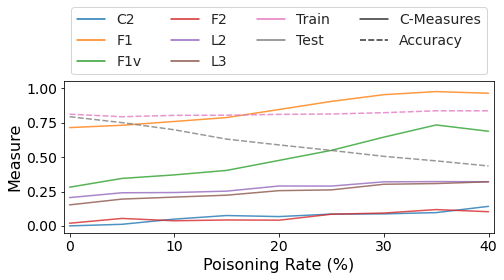

australian_std


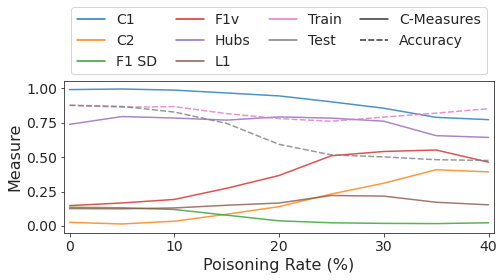

banknote_std


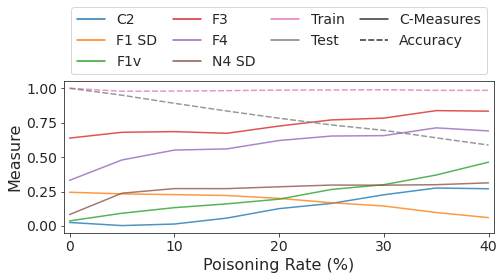

breastcancer_std


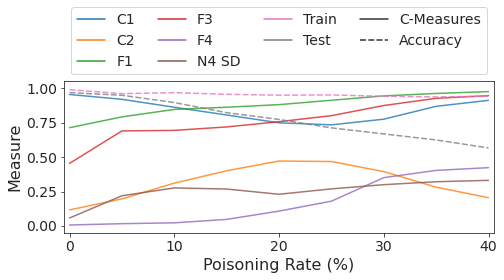

cmc_std


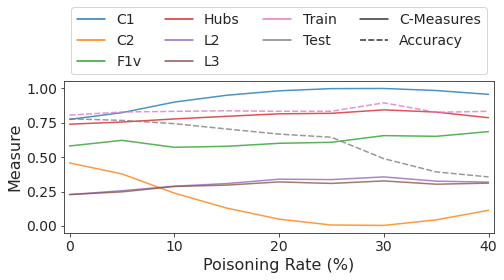

htru2_subset_std


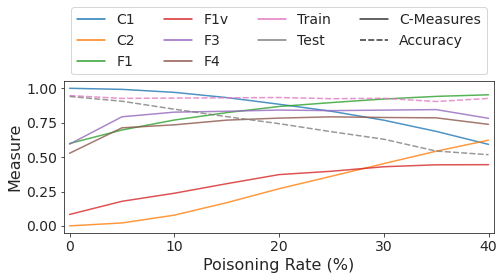

phoneme_subset_std


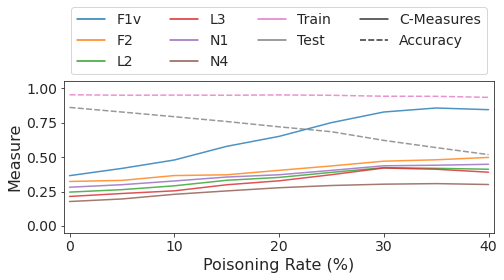

ringnorm_subset_std


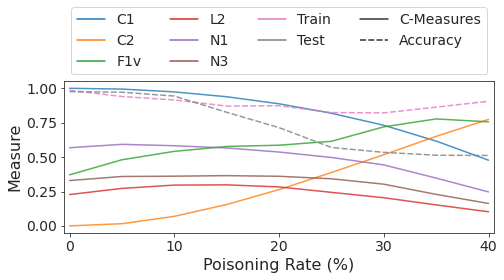

texture_subset_std


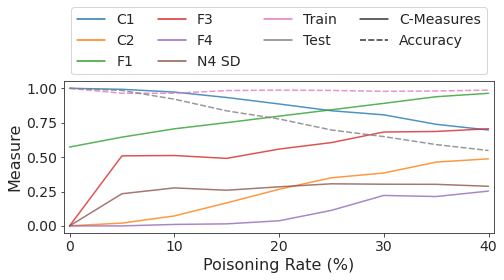

yeast_subset_std


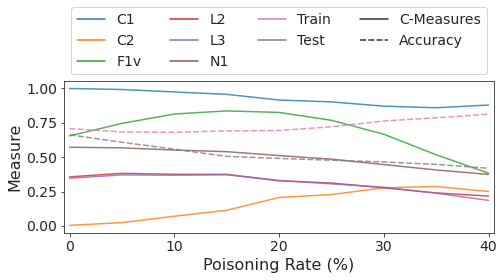

In [11]:
FONTSIZE = 14
FIGSIZE = (7, 4)

plt.rcParams["font.size"] = FONTSIZE

for dataname in datanames:
    print(dataname)
    df_pivot = get_mean_df(dataname, cols=cols_cm, n_features=N_FEATURES)
    df_pivot.to_csv(os.path.join(path_output, f'{dataname}_line.csv'), index=False)
    fig, ax = plt.subplots(figsize=FIGSIZE)

    sns.set_style(style='ticks')
    line_style = ['Accuracy' if a in ['Train', 'Test'] else 'C-Measures' for a in df_pivot['Measure']]
    g = sns.lineplot(data=df_pivot, x='Rate', y='Value', hue='Measure', ax=ax, style=line_style, legend='brief', alpha=0.8)
    plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=4)
    ax.set_xlabel('Poisoning Rate (%)', fontsize=FONTSIZE+2)
    ax.set(xlim=[-0.5, 40.5], ylim=[-0.05, 1.05])
    ax.set_ylabel('Measure', fontsize=FONTSIZE+2)
    plt.tight_layout(pad=0.8)
    plt.xticks(np.arange(0, 41, 10))
    
    path_fig_out = os.path.join(path_output, f'{dataname}_line.pdf', )
    # print(f'Save to: {path_fig_out}')
    # plt.savefig(path_fig_out, dpi=300, bbox_inches='tight')
    plt.show()

In [12]:
color_dict = {
    'Accuracy': 'darkgrey', 
    'C-Measures': 'darkgrey', 
    'C1': 'darkgrey', 
    'C2': 'darkgrey', 
    'F1': 'darkgrey', 
    'F1 SD': 'darkgrey', 
    'F1v': 'darkgrey',
    'F3': 'darkgrey',
    'F4': 'darkgrey',
    'Hubs': 'darkgrey',
    'L1': 'darkgrey',
    'N4 SD': 'darkgrey',
    'Test':'#2e7d32', 
    'Train': '#d32f2f',
}
sns.color_palette(list(color_dict.values()))

[(0.6627450980392157, 0.6627450980392157, 0.6627450980392157),
 (0.6627450980392157, 0.6627450980392157, 0.6627450980392157),
 (0.6627450980392157, 0.6627450980392157, 0.6627450980392157),
 (0.6627450980392157, 0.6627450980392157, 0.6627450980392157),
 (0.6627450980392157, 0.6627450980392157, 0.6627450980392157),
 (0.6627450980392157, 0.6627450980392157, 0.6627450980392157),
 (0.6627450980392157, 0.6627450980392157, 0.6627450980392157),
 (0.6627450980392157, 0.6627450980392157, 0.6627450980392157),
 (0.6627450980392157, 0.6627450980392157, 0.6627450980392157),
 (0.6627450980392157, 0.6627450980392157, 0.6627450980392157),
 (0.6627450980392157, 0.6627450980392157, 0.6627450980392157),
 (0.6627450980392157, 0.6627450980392157, 0.6627450980392157),
 (0.1803921568627451, 0.49019607843137253, 0.19607843137254902),
 (0.8274509803921568, 0.1843137254901961, 0.1843137254901961)]

In [13]:
# Custom colors
keys1 = ['C1', 'C2', 'F1 SD', 'F1v', 'Hubs', 'L1', 'Train', 'Test']
palette1 = sns.color_palette([color_dict[key] for key in keys1])

keys2 = ['C1', 'C2', 'F1', 'F3', 'F4', 'N4 SD', 'Train', 'Test']
palette2 = sns.color_palette([color_dict[key] for key in keys2])

In [14]:
def get_linestyle(name):
    if name == 'Train':
        return 'dashed'
    else:
        return 'solid'

def draw_subplot(df, dataname, ax, linewidth=2.5):
    # line_style = ['Accuracy' if a in ['Train', 'Test'] else 'C-Measures' for a in df_pivot['Measure']]
    line_style = [get_linestyle(m) for m in df['Measure']]
    sns.lineplot(data=df, x='Rate', y='Value', hue='Measure', ax=ax,
        style=line_style, alpha=0.9, legend='auto', palette=palette1, linewidth=linewidth)

    ax.set(xlim=[-1, 41], ylim=[-0.05, 1.05])
    ax.set_title(dataname, fontsize=FONTSIZE+1)
    ax.set_xlabel('Poisoning Rate (%)', fontsize=FONTSIZE+1)
    ax.set_ylabel('Measure', fontsize=FONTSIZE+1)
    ax.set_xticks(np.linspace(0, 40, num=5, endpoint=True), fontsize=FONTSIZE-1)
    ax.set_yticks(np.linspace(0, 1, num=5, endpoint=True), fontsize=FONTSIZE-1)
    ax.get_legend().remove()


Save to: /home/lukec/workspace/diva_01/results_plot/cm_line.pdf


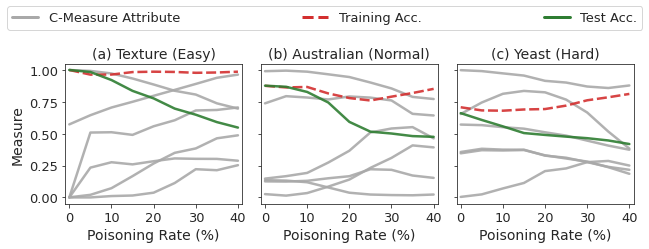

In [15]:
FONTSIZE = 13
FIGSIZE = (9, 3)
TITLES = [
    '(a) Texture (Easy)',
    '(b) Australian (Normal)',
    '(c) Yeast (Hard)'
]
LINEWIDTH=2.5
DATA_FILE = [
    'texture_subset_std_line.csv',
    'australian_std_line.csv',
    'yeast_subset_std_line.csv',
]
LABELS = [
    'C-Measure Attribute',
    'Training Acc.',
    'Test Acc.',
]
COLOURS = {
    'Train': '#d32f2f',  # Red
    'Test': '#2e7d32',  # Green
}


plt.rcParams["font.size"] = FONTSIZE
sns.set_style(style='ticks')
line_style = ['Accuracy' if a in ['Train', 'Test'] else 'C-Measures' for a in df_pivot['Measure']]

fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=FIGSIZE)
df_0 = pd.read_csv(os.path.join(path_output, DATA_FILE[0]))
draw_subplot(df_0, TITLES[0], axes[0], linewidth=LINEWIDTH)

df_1 = pd.read_csv(os.path.join(path_output, DATA_FILE[1]))
draw_subplot(df_1, TITLES[1], axes[1], linewidth=LINEWIDTH)

df_2 = pd.read_csv(os.path.join(path_output, DATA_FILE[2]))
draw_subplot(df_2, TITLES[2], axes[2], linewidth=LINEWIDTH)

label_dict = {}
for i in range(3):
    # Merge lines and labels
    lines, labels = axes[i].get_legend_handles_labels()
    for line, label in zip(lines, labels):
        label_dict[label] = line

# labels = ['C-Measures', 'Train', 'Test']
# lines = [label_dict[label] for label in labels]
custom_lines = [
    Line2D([0], [0], color='darkgrey', lw=LINEWIDTH+0.5, label=LABELS[0]),
    Line2D([0], [0], color=COLOURS['Train'], lw=LINEWIDTH+0.5, label=LABELS[1], linestyle='dashed'),
    Line2D([0], [0], color=COLOURS['Test'], lw=LINEWIDTH+0.5, label=LABELS[2]),
]
fig.legend(handles=custom_lines, bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=3)

plt.tight_layout(pad=0.8)
path_fig_out = os.path.join(path_output, f'cm_line.pdf', )
print(f'Save to: {path_fig_out}')
plt.savefig(path_fig_out, dpi=300, bbox_inches='tight')